# Covid 19 Analysis

The below analysis is performed on Covid 19 Dataset which is freely avabliable on GitHub. This is a near real time dataset which gets updated frequently on daily basis.

In this dataset I have tried performing analysis on various features to understand the spread of virus across various geographies and how the indivual counteries have been impacted economically.

I have been able to perform this analysis after having gteat learning on 'Data Analysis with Python: Zero to Pandas' the details can be found [here]('https://jovian.ml/learn/data-analysis-with-python-zero-to-pandas').

In [84]:
pip install pandas numpy matplotlib seaborn scipy plotly folium cufflinks sklearn

In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib import style

style.use('ggplot')

import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objects as go

import folium 
from folium import plugins
plt.rcParams['figure.figsize'] = 20, 8
import warnings
warnings.filterwarnings('ignore')

import cufflinks as cf
import plotly.offline as pyo

from plotly.offline import init_notebook_mode,plot,iplot

In [89]:
import jovian
project_name = "Covid19-Analysis"
jovian.commit(project='Covid19-Analysis', environment=None, filename='Covid19-Analysis')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/hargurjeet/covid19-analysis


'https://jovian.ml/hargurjeet/covid19-analysis'

## Data Preparation and Cleaning


In [6]:
link_covid_data= 'https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-data.csv'

raw_data = pd.read_csv(link_covid_data)

raw_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29,NaN


In [7]:
schema_discription = "https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/owid-covid-codebook.csv"

schema_fname = pd.read_csv(schema_discription, index_col='column').description

schema_fname.head()

column
iso_code       ISO 3166-1 alpha-3 – three-letter country codes
continent               Continent of the geographical location
location                                 Geographical location
date                                       Date of observation
total_cases                  Total confirmed cases of COVID-19
Name: description, dtype: object

# Preparing and Cleaning Raw Covid Data

This is done to make the dataset sutiable for analysis. The existing dataset might containing junk and irrelenvant values hence it is very important to clear such data. I have selected only those columns which are relevant to my analysis only

In [8]:
raw_data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy', 'human_development_index'],
      dtype='object')

In [9]:
# Selecting the columns for analysis

selected_col = [
    #Geography
    'continent','location','date',
    
    #Covid cases per million
    'total_cases_per_million','total_deaths_per_million',
    
    #Economy
    'gdp_per_capita', 'extreme_poverty',
    
    #Human factor
    'population', 'population_density','aged_65_older','aged_70_older',
    
    #Medical Facilites
    'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers','male_smokers',
    'hospital_beds_per_thousand','life_expectancy', 'human_development_index'
]

In [10]:
len(selected_col)  # 18 out of 40 columns are selected for performing the current anaylysis

18

In [11]:
survey_df = raw_data[selected_col]
survey_df.head()

,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,North America,Aruba,2020-03-13,18.733,0.0,35973.781,NaN,106766.0,584.8,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
1,North America,Aruba,2020-03-19,NaN,NaN,35973.781,NaN,106766.0,584.8,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
2,North America,Aruba,2020-03-20,37.465,0.0,35973.781,NaN,106766.0,584.8,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
3,North America,Aruba,2020-03-21,NaN,NaN,35973.781,NaN,106766.0,584.8,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,35973.781,NaN,106766.0,584.8,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN


In [12]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47328 entries, 0 to 47327
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   continent                   46776 non-null  object 
 1   location                    47328 non-null  object 
 2   date                        47328 non-null  object 
 3   total_cases_per_million     46438 non-null  float64
 4   total_deaths_per_million    46438 non-null  float64
 5   gdp_per_capita              41649 non-null  float64
 6   extreme_poverty             27790 non-null  float64
 7   population                  47052 non-null  float64
 8   population_density          44901 non-null  float64
 9   aged_65_older               41567 non-null  float64
 10  aged_70_older               41976 non-null  float64
 11  cardiovasc_death_rate       42203 non-null  float64
 12  diabetes_prevalence         43693 non-null  float64
 13  female_smokers              330

In [13]:
# Removing the location that donot have continent information
survey_df.continent.replace('',np.nan, inplace =True)  # Replacing blanks with NaN

survey_df.dropna(subset=['continent'], inplace=True)   # Droping all the records from DF where continent is NaN

In [14]:
# Converting the date colume to datatime Dtype
survey_df.date = pd.to_datetime(survey_df.date, errors='coerce')
survey_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 46776 entries, 0 to 46775
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   continent                   46776 non-null  object        
 1   location                    46776 non-null  object        
 2   date                        46776 non-null  datetime64[ns]
 3   total_cases_per_million     46162 non-null  float64       
 4   total_deaths_per_million    46162 non-null  float64       
 5   gdp_per_capita              41373 non-null  float64       
 6   extreme_poverty             27514 non-null  float64       
 7   population                  46776 non-null  float64       
 8   population_density          44625 non-null  float64       
 9   aged_65_older               41291 non-null  float64       
 10  aged_70_older               41700 non-null  float64       
 11  cardiovasc_death_rate       41927 non-null  float64   

In [15]:
survey_df

,continent,location,date,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,North America,Aruba,2020-03-13,18.733,0.000,35973.781,NaN,106766.0,584.800,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
1,North America,Aruba,2020-03-19,NaN,NaN,35973.781,NaN,106766.0,584.800,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
2,North America,Aruba,2020-03-20,37.465,0.000,35973.781,NaN,106766.0,584.800,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
3,North America,Aruba,2020-03-21,NaN,NaN,35973.781,NaN,106766.0,584.800,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
4,North America,Aruba,2020-03-22,NaN,NaN,35973.781,NaN,106766.0,584.800,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46771,Africa,Zimbabwe,2020-09-27,524.998,15.273,1899.775,21.4,14862927.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.535
46772,Africa,Zimbabwe,2020-09-28,525.603,15.273,1899.775,21.4,14862927.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.535
46773,Africa,Zimbabwe,2020-09-29,525.872,15.340,1899.775,21.4,14862927.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.535
46774,Africa,Zimbabwe,2020-09-30,527.285,15.340,1899.775,21.4,14862927.0,42.729,2.822,1.882,307.846,1.82,1.6,30.7,1.7,61.49,0.535


In [16]:
survey_df.describe()

,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
count,46162.000000,46162.000000,41373.000000,27514.000000,4.677600e+04,44625.000000,41291.000000,41700.000000,41927.000000,43417.000000,32778.000000,32359.000000,37844.000000,46182.000000,40717.000000
mean,1972.423338,59.004458,20929.760973,12.148583,4.282860e+07,362.369970,9.259692,5.857568,251.715423,8.046398,10.848051,32.617732,3.112873,74.031168,0.724771
std,4153.002324,145.373043,20490.490633,19.323913,1.573392e+08,1659.596613,6.339352,4.328597,117.906376,4.160803,10.515037,13.475584,2.535394,7.394619,0.152834
min,0.000000,0.000000,661.240000,0.100000,8.090000e+02,0.137000,1.144000,0.526000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000,0.354000
25%,32.491250,0.024000,5338.454000,0.500000,1.399491e+06,37.728000,3.552000,2.085000,155.898000,5.310000,1.900000,21.400000,1.300000,69.870000,0.606000
50%,288.848000,5.039000,14048.881000,1.800000,8.278737e+06,90.672000,6.981000,4.393000,238.339000,7.110000,6.300000,31.400000,2.500000,75.490000,0.754000
75%,2048.025000,36.235500,32415.132000,18.100000,2.982597e+07,222.873000,14.762000,9.473000,318.991000,10.390000,19.600000,40.900000,4.200000,79.930000,0.853000
max,43650.601000,1237.551000,116935.600000,77.600000,1.439324e+09,19347.500000,27.049000,18.493000,724.417000,23.360000,44.000000,78.100000,13.800000,86.750000,0.953000


# Exploratory Analysis and Visualization

Following is the feature analysis of various attributes of the dataset

## GDP trend of affected counteries

In [17]:
# Dataset_LocationWise = survey_df.groupby('location', as_index=False)
Dataset_LocationWise = survey_df.groupby('location').max('date')
Dataset_LocationWise

,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
location,,,,,,,,,,,,,,,
Afghanistan,1008.725,37.453,1803.987,NaN,38928341.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.50,64.83,0.498
Albania,4742.859,134.478,11803.431,1.1,2877800.0,104.871,13.188,8.643,304.195,10.08,7.1,51.2,2.89,78.57,0.785
Algeria,1175.115,39.543,13913.839,0.5,43851043.0,17.348,6.211,3.857,278.364,6.73,0.7,30.4,1.90,76.88,0.754
Andorra,26532.065,685.951,NaN,NaN,77265.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,NaN,83.73,0.858
Angola,152.527,5.538,5819.495,NaN,32866268.0,23.890,2.405,1.362,276.045,3.94,NaN,NaN,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,11.239,0.360,6171.884,2.0,97338583.0,308.127,7.150,4.718,245.465,6.00,1.0,45.9,2.60,75.40,0.694
Western Sahara,1282.373,1.674,NaN,NaN,597330.0,NaN,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN
Yemen,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452


In [18]:
top_countries = Dataset_LocationWise.gdp_per_capita.sort_values(ascending =False).head(15)
top_countries

location
Qatar                   116935.600
Luxembourg               94277.965
Singapore                85535.383
Brunei                   71809.251
Ireland                  67335.293
United Arab Emirates     67293.483
Kuwait                   65530.537
Norway                   64800.057
Switzerland              57410.166
San Marino               56861.470
Hong Kong                56054.920
United States            54225.446
Bermuda                  50669.315
Cayman Islands           49903.029
Saudi Arabia             49045.411
Name: gdp_per_capita, dtype: float64

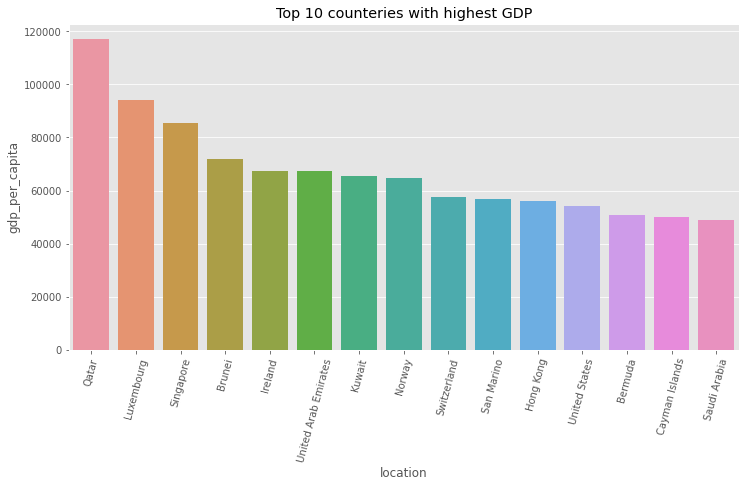

In [19]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('Top 10 counteries with highest GDP')
sns.barplot(top_countries.index, top_countries);

Above trends shows the counteries having the highest GDP per capita among 210 counteries

In [20]:
bottom_countries = Dataset_LocationWise.gdp_per_capita.sort_values(ascending =False).tail(50).where(Dataset_LocationWise.gdp_per_capita > 0)
bottom_countries = bottom_countries.dropna().tail(10)

In [21]:
bottom_countries

location
Madagascar                      1416.440
Comoros                         1413.890
Sierra Leone                    1390.300
Mozambique                      1136.103
Malawi                          1095.042
Niger                            926.000
Democratic Republic of Congo     808.133
Liberia                          752.788
Burundi                          702.225
Central African Republic         661.240
Name: gdp_per_capita, dtype: float64

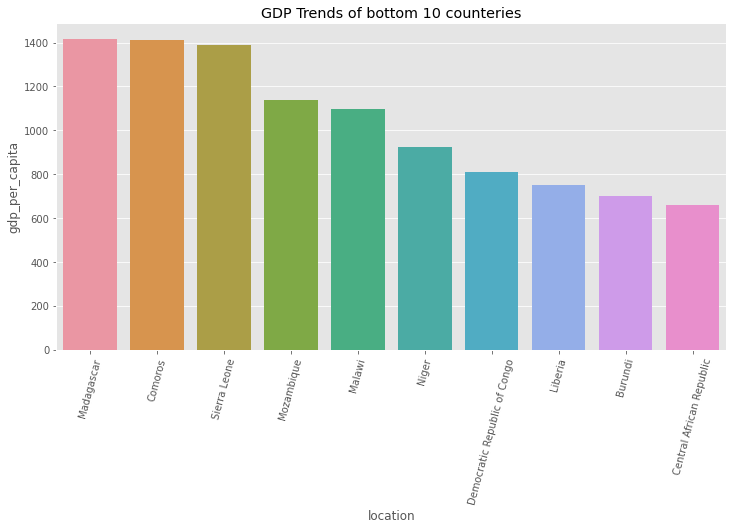

In [22]:
plt.figure(figsize=(12,6))
plt.xticks(rotation=75)
plt.title('GDP Trends of bottom 10 counteries')
sns.barplot(bottom_countries.index, bottom_countries);

Above visual display counteries having the lowest GDP. Hence the economy of these counteries having taken a major hit due to Covid19.

## Medical infrastructure

Here I try to analyse counteries have the best medical infra

In [71]:
Dataset_LocationWise = survey_df.groupby('location', as_index=False)
Dataset_LocationWise = Dataset_LocationWise.max('date')
Dataset_LocationWise

,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,1008.725,37.453,1803.987,NaN,38928341.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.50,64.83,0.498
1,Albania,4742.859,134.478,11803.431,1.1,2877800.0,104.871,13.188,8.643,304.195,10.08,7.1,51.2,2.89,78.57,0.785
2,Algeria,1175.115,39.543,13913.839,0.5,43851043.0,17.348,6.211,3.857,278.364,6.73,0.7,30.4,1.90,76.88,0.754
3,Andorra,26532.065,685.951,NaN,NaN,77265.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,NaN,83.73,0.858
4,Angola,152.527,5.538,5819.495,NaN,32866268.0,23.890,2.405,1.362,276.045,3.94,NaN,NaN,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,11.239,0.360,6171.884,2.0,97338583.0,308.127,7.150,4.718,245.465,6.00,1.0,45.9,2.60,75.40,0.694
206,Western Sahara,1282.373,1.674,NaN,NaN,597330.0,NaN,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN
207,Yemen,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452
208,Zambia,802.820,18.059,3689.251,57.5,18383956.0,22.995,2.480,1.542,234.499,3.94,3.1,24.7,2.00,63.89,0.588


In [87]:
pyo.init_notebook_mode(connected=True)

cf.go_offline()

Dataset_LocationWise.iplot(kind='bar', x='location',y='hospital_beds_per_thousand',mode ='markers+lines',title = 'Beds Avaliablity Across Counteries',
         xTitle='Counteries',yTitle='Hospital Beds',colors='red',size=10)



Output hidden; open in https://colab.research.google.com to view.

Counteries like Belarus,Japan,Monoaco and South Korea seems to have highest no of hospital beds

## Human Factor



In [66]:
Dataset_LocationWise = survey_df.groupby('continent', as_index=False)
Dataset_LocationWise = Dataset_LocationWise.max('date')
Dataset_LocationWise

,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Africa,11369.986,282.151,26382.287,77.6,2.061396e+08,622.962,10.945,5.884,525.432,22.02,9.7,65.8,6.30,76.88,0.797
1,Asia,43650.601,323.633,116935.600,30.3,1.439324e+09,7915.731,27.049,18.493,724.417,17.72,26.9,78.1,13.05,84.86,0.933
2,Europe,26532.065,1237.551,94277.965,5.7,1.459345e+08,19347.500,23.021,16.240,539.849,10.08,44.0,58.3,13.80,86.75,0.953
3,North America,37118.558,625.155,54225.446,23.5,3.310026e+08,1308.820,18.601,10.799,430.548,17.11,19.1,53.3,5.80,83.92,0.926
4,Oceania,14474.207,278.464,44648.710,1.4,2.549988e+07,304.128,15.504,10.129,561.494,23.36,23.5,48.8,3.84,83.44,0.939
5,South America,24712.872,984.567,22767.037,7.1,2.125594e+08,66.939,14.655,10.361,373.159,12.54,34.2,42.9,5.00,81.44,0.843


In [26]:
schema_fname.cardiovasc_death_rate

'Death rate from cardiovascular disease in 2017 (annual number of deaths per 100,000 people)'

In [27]:
Dataset_LocationWise.iplot(kind='scatter', x='continent',y='cardiovasc_death_rate',mode ='markers+lines',title = 'Cardiovasc Death Rate',
         xTitle='Counteries',yTitle='Death Rate',colors='red',size=10)

The above data shows Aisa has most no of death rate due to the cardio vascular related diseases.

# Asking and Answering Questions

## 1.Which counteries have highest no of cases and deaths per million ?

Top 10 Countries - Highest no of cases per million vs Death per million




In [28]:
Top_10_counteries_highest_total_cases = survey_df.groupby('location', as_index=False).max('date').sort_values('total_cases_per_million', ascending = False).head(10)

Top_10_counteries_highest_total_cases

,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
155,Qatar,43650.601,74.278,116935.600,NaN,2881060.0,227.322,1.307,0.617,176.690,16.52,0.8,26.9,1.20,80.23,0.856
14,Bahrain,41645.926,148.097,43290.705,NaN,1701583.0,1935.907,2.372,1.387,151.689,16.52,5.8,37.6,2.00,77.29,0.846
9,Aruba,37118.558,252.889,35973.781,NaN,106766.0,584.800,13.085,7.452,NaN,11.62,NaN,NaN,NaN,76.29,NaN
96,Israel,28667.532,181.502,33132.320,0.5,8655541.0,402.606,11.733,7.359,93.320,6.74,15.4,35.4,2.99,82.97,0.903
3,Andorra,26532.065,685.951,NaN,NaN,77265.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,NaN,83.73,0.858
147,Panama,26095.262,549.740,22267.037,2.2,4314768.0,55.133,7.918,5.030,128.346,8.33,2.4,9.9,2.30,78.51,0.789
150,Peru,24712.872,984.567,12236.706,3.5,32971846.0,25.129,7.151,4.455,85.755,5.95,4.8,NaN,1.60,76.74,0.750
105,Kuwait,24629.539,142.838,65530.537,NaN,4270563.0,232.128,2.345,1.114,132.235,15.84,2.7,37.0,2.00,75.49,0.803
40,Chile,24219.813,666.502,22767.037,1.3,19116209.0,24.282,11.087,6.938,127.993,8.46,34.2,41.5,2.11,80.18,0.843
27,Brazil,22633.366,677.232,14103.452,3.4,212559409.0,25.040,8.552,5.060,177.961,8.11,10.1,17.9,2.20,75.88,0.759


In [29]:
pyo.init_notebook_mode(connected=True)

cf.go_offline()

In [30]:
Top_10_counteries_highest_total_cases.iplot(kind='scatter', x='location',y='total_cases_per_million',mode ='markers+lines',title = 'Highest No Of Covid Cases per million',
         xTitle='Counteries',yTitle='Total Cases(in million)',colors='red',size=10)


In [31]:
Top_10_counteries_highest_total_cases.iplot(kind='scatter', x='location',y='total_deaths_per_million',mode ='markers+lines',title = 'Deaths per million',
         xTitle='Counteries',yTitle='Total Cases(in million)',colors='blue',size=10)

From the above two graphs we can conclude even though the total cases are high in counteris like Qatar, Bharain...etc but the death rate is low. Highest death rate is observed in Peru

## 2.Which counteris have lowest no of deaths per million.

In [32]:
Top_10_counteries_lowest_total_cases = survey_df.groupby('location', as_index=False).max('date').sort_values('total_cases_per_million', ascending=True).head(10)

Top_10_counteries_lowest_total_cases

,location,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
107,Laos,3.161,0.000,6397.360,22.7,7275556.0,29.715,4.029,2.322,368.111,4.00,7.3,51.2,1.5,67.92,0.601
187,Tanzania,8.521,0.352,2683.304,49.1,59734213.0,64.699,3.108,1.874,217.288,5.75,3.3,26.7,0.7,65.46,0.538
205,Vietnam,11.239,0.360,6171.884,2.0,97338583.0,308.127,7.150,4.718,245.465,6.00,1.0,45.9,2.6,75.40,0.694
33,Cambodia,16.568,0.000,3645.070,NaN,16718971.0,90.672,4.412,2.385,270.892,4.00,2.0,33.7,0.8,69.82,0.582
189,Timor,21.237,0.000,6570.102,30.3,1318442.0,87.176,3.556,1.897,335.346,6.86,6.3,78.1,5.9,69.50,0.625
185,Taiwan,21.581,0.294,NaN,NaN,23816775.0,NaN,NaN,8.353,103.957,NaN,NaN,NaN,NaN,80.46,NaN
66,Fiji,35.697,2.231,8702.975,1.4,896444.0,49.562,6.224,3.284,412.820,14.49,10.2,34.8,2.3,67.44,0.741
32,Burundi,42.722,0.084,702.225,71.7,11890781.0,423.062,2.562,1.504,293.068,6.05,NaN,NaN,0.8,61.58,0.417
140,Niger,49.449,2.850,926.000,44.5,24206636.0,16.955,2.553,1.378,238.339,2.42,0.1,15.4,0.3,62.42,0.354
188,Thailand,51.132,0.845,16277.671,0.1,69799978.0,135.132,11.373,6.890,109.861,7.04,1.9,38.8,2.1,77.15,0.755


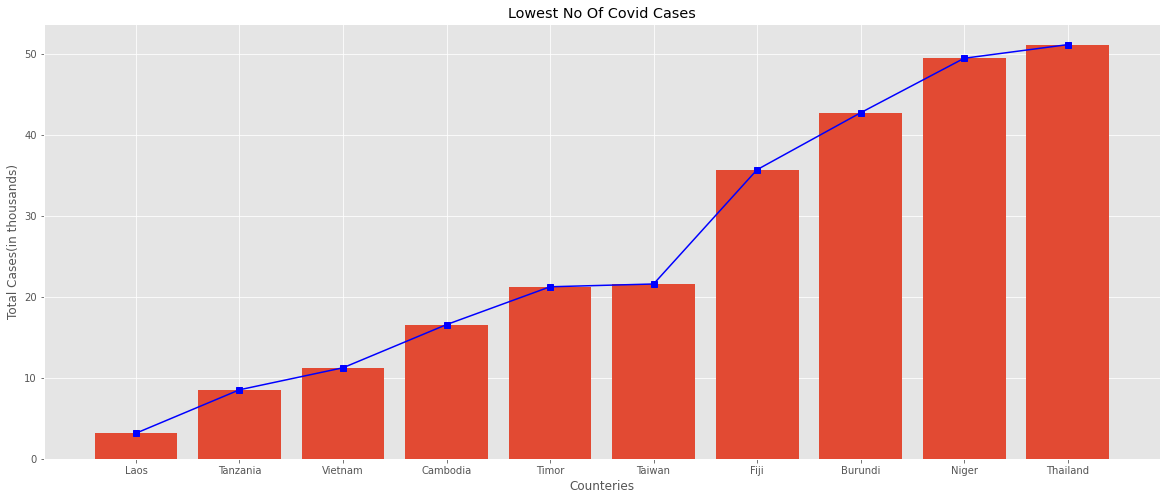

In [33]:
plt.plot(Top_10_counteries_lowest_total_cases.location, Top_10_counteries_lowest_total_cases.total_cases_per_million, 's-b')
plt.bar(Top_10_counteries_lowest_total_cases.location, Top_10_counteries_lowest_total_cases.total_cases_per_million)

plt.xlabel('Counteries')
plt.ylabel('Total Cases(in thousands)')

plt.title('Lowest No Of Covid Cases');

In [34]:
Top_10_counteries_lowest_total_cases.iplot(kind='scatter', x='location',y='total_deaths_per_million',mode ='markers+lines',title = 'Lowest Covid Cases per million',
         xTitle='Counteries',yTitle='Total Cases(in million)',colors='red',size=10)

With above 2 graphs I conclude that even though the Covid cases are on the rise for Cambodia, Timor and Burundi but total deaths have seen a dip.

Counteries like Fiji and Niger has seen sudden inceases in deaths

## 3.How many counteris are present under each continents

In [35]:
Dataset_LocationWise = survey_df.groupby(['location','continent'], as_index=False).max('date')
Dataset_LocationWise

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,Asia,1008.725,37.453,1803.987,NaN,38928341.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.50,64.83,0.498
1,Albania,Europe,4742.859,134.478,11803.431,1.1,2877800.0,104.871,13.188,8.643,304.195,10.08,7.1,51.2,2.89,78.57,0.785
2,Algeria,Africa,1175.115,39.543,13913.839,0.5,43851043.0,17.348,6.211,3.857,278.364,6.73,0.7,30.4,1.90,76.88,0.754
3,Andorra,Europe,26532.065,685.951,NaN,NaN,77265.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,NaN,83.73,0.858
4,Angola,Africa,152.527,5.538,5819.495,NaN,32866268.0,23.890,2.405,1.362,276.045,3.94,NaN,NaN,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,11.239,0.360,6171.884,2.0,97338583.0,308.127,7.150,4.718,245.465,6.00,1.0,45.9,2.60,75.40,0.694
206,Western Sahara,Africa,1282.373,1.674,NaN,NaN,597330.0,NaN,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN
207,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452
208,Zambia,Africa,802.820,18.059,3689.251,57.5,18383956.0,22.995,2.480,1.542,234.499,3.94,3.1,24.7,2.00,63.89,0.588


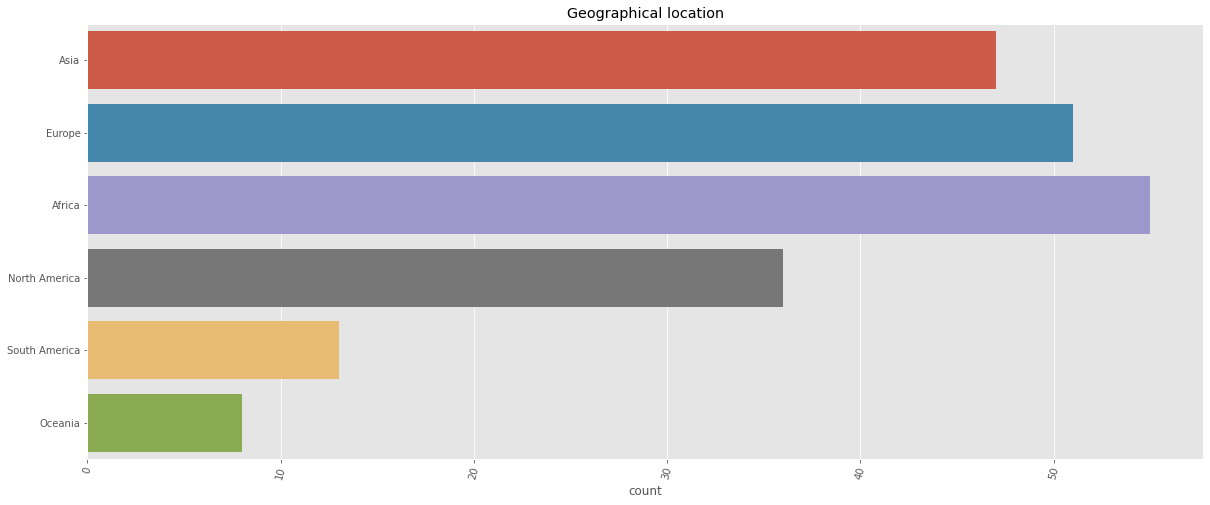

In [36]:
sns.countplot(y=Dataset_LocationWise.continent)
plt.xticks(rotation=75);
plt.title(schema_fname.location)
plt.ylabel(None);

### 3.1 What are the cases vs death rate across contients

In [37]:
Dataset_LocationWise = survey_df.groupby(['location','continent'], as_index=False).max('date')
Dataset_LocationWise

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index
0,Afghanistan,Asia,1008.725,37.453,1803.987,NaN,38928341.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.50,64.83,0.498
1,Albania,Europe,4742.859,134.478,11803.431,1.1,2877800.0,104.871,13.188,8.643,304.195,10.08,7.1,51.2,2.89,78.57,0.785
2,Algeria,Africa,1175.115,39.543,13913.839,0.5,43851043.0,17.348,6.211,3.857,278.364,6.73,0.7,30.4,1.90,76.88,0.754
3,Andorra,Europe,26532.065,685.951,NaN,NaN,77265.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,NaN,83.73,0.858
4,Angola,Africa,152.527,5.538,5819.495,NaN,32866268.0,23.890,2.405,1.362,276.045,3.94,NaN,NaN,NaN,61.15,0.581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,11.239,0.360,6171.884,2.0,97338583.0,308.127,7.150,4.718,245.465,6.00,1.0,45.9,2.60,75.40,0.694
206,Western Sahara,Africa,1282.373,1.674,NaN,NaN,597330.0,NaN,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN
207,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452
208,Zambia,Africa,802.820,18.059,3689.251,57.5,18383956.0,22.995,2.480,1.542,234.499,3.94,3.1,24.7,2.00,63.89,0.588


In [38]:
Dataset_LocationWise['Death_Percentage'] = (Dataset_LocationWise.total_deaths_per_million / Dataset_LocationWise.total_cases_per_million)*100

Dataset_LocationWise

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Death_Percentage
0,Afghanistan,Asia,1008.725,37.453,1803.987,NaN,38928341.0,54.422,2.581,1.337,597.029,9.59,NaN,NaN,0.50,64.83,0.498,3.712905
1,Albania,Europe,4742.859,134.478,11803.431,1.1,2877800.0,104.871,13.188,8.643,304.195,10.08,7.1,51.2,2.89,78.57,0.785,2.835378
2,Algeria,Africa,1175.115,39.543,13913.839,0.5,43851043.0,17.348,6.211,3.857,278.364,6.73,0.7,30.4,1.90,76.88,0.754,3.365032
3,Andorra,Europe,26532.065,685.951,NaN,NaN,77265.0,163.755,NaN,NaN,109.135,7.97,29.0,37.8,NaN,83.73,0.858,2.585366
4,Angola,Africa,152.527,5.538,5819.495,NaN,32866268.0,23.890,2.405,1.362,276.045,3.94,NaN,NaN,NaN,61.15,0.581,3.630833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205,Vietnam,Asia,11.239,0.360,6171.884,2.0,97338583.0,308.127,7.150,4.718,245.465,6.00,1.0,45.9,2.60,75.40,0.694,3.203132
206,Western Sahara,Africa,1282.373,1.674,NaN,NaN,597330.0,NaN,NaN,1.380,NaN,NaN,NaN,NaN,NaN,70.26,NaN,0.130539
207,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452,28.893872
208,Zambia,Africa,802.820,18.059,3689.251,57.5,18383956.0,22.995,2.480,1.542,234.499,3.94,3.1,24.7,2.00,63.89,0.588,2.249446


In [39]:
Dataset_LocationWise.describe()

,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Death_Percentage
count,209.000000,209.000000,183.000000,121.000000,2.100000e+02,199.000000,183.000000,185.000000,185.000000,193.000000,140.000000,138.000000,164.000000,207.000000,180.000000,209.000000
mean,5561.083206,125.852493,19485.912399,13.861983,3.694276e+07,361.888980,8.848787,5.565368,256.172049,8.063264,10.441429,32.621739,3.012671,73.529855,0.711233,2.459332
std,7523.042812,199.950017,19820.802488,20.535661,1.425092e+08,1577.500094,6.213074,4.216641,116.512451,4.244975,10.480376,13.709168,2.464917,7.560056,0.155463,2.744851
min,3.161000,0.000000,661.240000,0.100000,8.090000e+02,0.137000,1.144000,0.526000,79.370000,0.990000,0.100000,7.700000,0.100000,53.280000,0.354000,0.000000
25%,588.993000,6.857000,4504.151000,0.600000,1.031042e+06,37.520000,3.453500,2.034000,168.711000,5.310000,1.900000,21.450000,1.300000,69.260000,0.588750,0.922810
50%,2736.982000,37.453000,13111.214000,2.200000,6.909866e+06,87.324000,6.704000,3.915000,242.648000,7.140000,6.050000,31.300000,2.358500,75.090000,0.744000,1.898553
75%,7507.067000,154.967000,28349.983500,21.400000,2.615868e+07,214.001000,14.371500,9.167000,322.688000,10.430000,19.150000,41.250000,3.895750,78.940000,0.832750,3.091205
max,43650.601000,1237.551000,116935.600000,77.600000,1.439324e+09,19347.500000,27.049000,18.493000,724.417000,23.360000,44.000000,78.100000,13.800000,86.750000,0.953000,28.893872


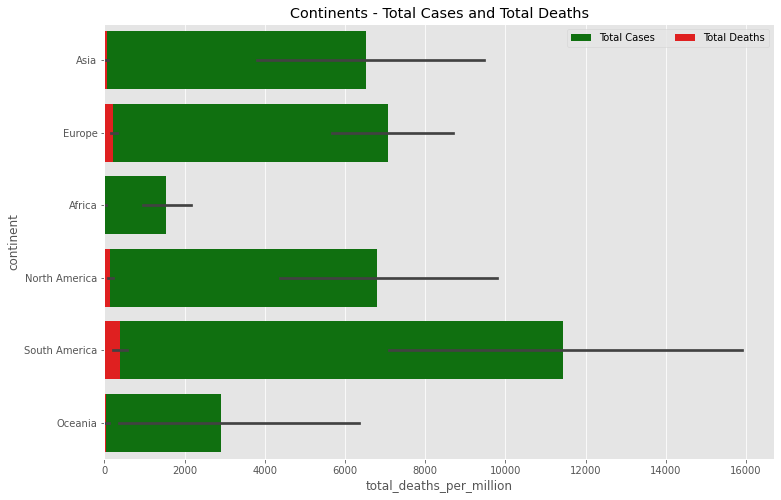

In [40]:
f, ax = plt.subplots(figsize=(12, 8))
data = Dataset_LocationWise[['continent','total_cases_per_million','total_deaths_per_million']]
data.sort_values('total_cases_per_million',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="total_cases_per_million", y="continent", data=Dataset_LocationWise,label="Total Cases", color="green")

sns.set_color_codes("muted")
sns.barplot(x="total_deaths_per_million", y="continent", data=Dataset_LocationWise, label="Total Deaths", color="red")
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Continents - Total Cases and Total Deaths');
# ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
# sns.despine(left=True, bottom=True)

The highest variation of total cases is observed in counteries in South America continent and least variation is observed in Africe continent

## 4.Which are the counteris having death rate over 10%

In [41]:
Dataset_LocationWise = Dataset_LocationWise[Dataset_LocationWise.Death_Percentage > 10]
Dataset_LocationWise.reset_index(drop = True, inplace=True)
Dataset_LocationWise

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Death_Percentage
0,Italy,Europe,5207.600,593.664,35220.084,2.0,60461828.0,205.859,23.021,16.240,113.151,4.78,19.8,27.8,3.18,83.51,0.880,11.399954
1,Mexico,North America,5764.369,602.221,17336.469,2.5,128932753.0,66.444,6.857,4.321,152.783,13.06,6.9,21.4,1.38,75.05,0.774,10.447301
2,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452,28.893872


In [42]:
# Data needs to be scaled before it actually plotted

from sklearn.preprocessing import StandardScaler

Dataset_LocationWise

Scaler = StandardScaler()

standardized = Scaler.fit_transform(Dataset_LocationWise[['total_cases_per_million']])

In [43]:
df = pd.DataFrame(standardized, columns=['total_cases_per_million_standardized'])
df = df.abs()
df


,total_cases_per_million_standardized
0,0.595751
1,0.812895
2,1.408646


In [44]:
Dataset_LocationWise = Dataset_LocationWise.join(df)
Dataset_LocationWise

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Death_Percentage,total_cases_per_million_standardized
0,Italy,Europe,5207.600,593.664,35220.084,2.0,60461828.0,205.859,23.021,16.240,113.151,4.78,19.8,27.8,3.18,83.51,0.880,11.399954,0.595751
1,Mexico,North America,5764.369,602.221,17336.469,2.5,128932753.0,66.444,6.857,4.321,152.783,13.06,6.9,21.4,1.38,75.05,0.774,10.447301,0.812895
2,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452,28.893872,1.408646


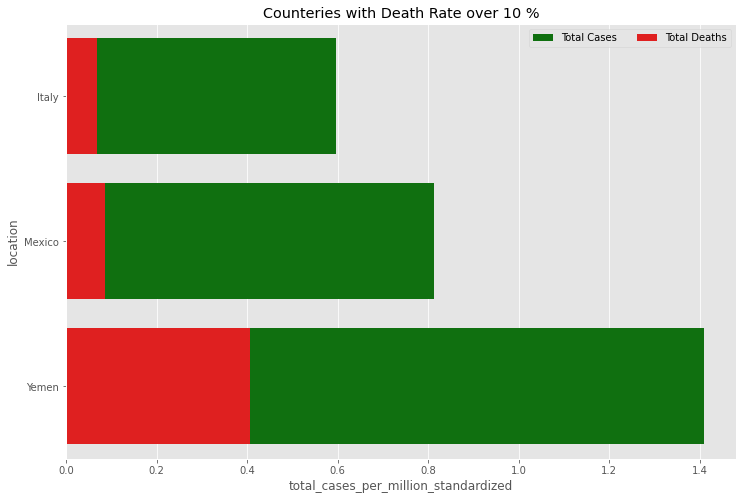

In [45]:
f, ax = plt.subplots(figsize=(12, 8))
data = Dataset_LocationWise[['continent','total_cases_per_million_standardized','total_deaths_per_million']]
data.sort_values('total_cases_per_million_standardized',ascending=False,inplace=True)

sns.set_color_codes("pastel")
sns.barplot(x="total_cases_per_million_standardized", y="location", data=Dataset_LocationWise,label="Total Cases", color="green")


sns.set_color_codes("muted")
sns.barplot(x=(Dataset_LocationWise.total_cases_per_million_standardized * Dataset_LocationWise.Death_Percentage)/100, y="location", data=Dataset_LocationWise, label="Total Deaths", color="red");


ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_title('Counteries with Death Rate over 10 %');
# ax.set(xlim=(0, 35), ylabel="",xlabel="Cases")
# sns.despine(left=True, bottom=True)

Above data displays that Yemen has the highest death rate

In [46]:
lat_long = pd.read_csv('https://raw.githubusercontent.com/hargurjeet/MachineLearning/master/world_country_and_usa_states_latitude_and_longitude_values.csv')
lat_long

,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,AD,42.546245,1.601554,Andorra,AK,63.588753,-154.493062,Alaska
1,AE,23.424076,53.847818,United Arab Emirates,AL,32.318231,-86.902298,Alabama
2,AF,33.939110,67.709953,Afghanistan,AR,35.201050,-91.831833,Arkansas
3,AG,17.060816,-61.796428,Antigua and Barbuda,AZ,34.048928,-111.093731,Arizona
4,AI,18.220554,-63.068615,Anguilla,CA,36.778261,-119.417932,California
...,...,...,...,...,...,...,...,...
240,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN
241,YT,-12.827500,45.166244,Mayotte,NaN,NaN,NaN,NaN
242,ZA,-30.559482,22.937506,South Africa,NaN,NaN,NaN,NaN
243,ZM,-13.133897,27.849332,Zambia,NaN,NaN,NaN,NaN


In [47]:
Complete_Dateset = Dataset_LocationWise.merge(lat_long, how='inner', left_on='location', right_on='country')
Complete_Dateset

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Death_Percentage,total_cases_per_million_standardized,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Italy,Europe,5207.600,593.664,35220.084,2.0,60461828.0,205.859,23.021,16.240,113.151,4.78,19.8,27.8,3.18,83.51,0.880,11.399954,0.595751,IT,41.871940,12.567380,Italy,NaN,NaN,NaN,NaN
1,Mexico,North America,5764.369,602.221,17336.469,2.5,128932753.0,66.444,6.857,4.321,152.783,13.06,6.9,21.4,1.38,75.05,0.774,10.447301,0.812895,MX,23.634501,-102.552784,Mexico,NaN,NaN,NaN,NaN
2,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452,28.893872,1.408646,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN


In [48]:
pd.set_option('display.max_columns', None)
Complete_Dateset

,location,continent,total_cases_per_million,total_deaths_per_million,gdp_per_capita,extreme_poverty,population,population_density,aged_65_older,aged_70_older,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,hospital_beds_per_thousand,life_expectancy,human_development_index,Death_Percentage,total_cases_per_million_standardized,country_code,latitude,longitude,country,usa_state_code,usa_state_latitude,usa_state_longitude,usa_state
0,Italy,Europe,5207.600,593.664,35220.084,2.0,60461828.0,205.859,23.021,16.240,113.151,4.78,19.8,27.8,3.18,83.51,0.880,11.399954,0.595751,IT,41.871940,12.567380,Italy,NaN,NaN,NaN,NaN
1,Mexico,North America,5764.369,602.221,17336.469,2.5,128932753.0,66.444,6.857,4.321,152.783,13.06,6.9,21.4,1.38,75.05,0.774,10.447301,0.812895,MX,23.634501,-102.552784,Mexico,NaN,NaN,NaN,NaN
2,Yemen,Asia,68.229,19.714,1479.147,18.8,29825968.0,53.508,2.922,1.583,495.003,5.35,7.6,29.2,0.70,66.12,0.452,28.893872,1.408646,YE,15.552727,48.516388,Yemen,NaN,NaN,NaN,NaN


In [49]:
Complete_Dateset.columns

Index(['location', 'continent', 'total_cases_per_million',
       'total_deaths_per_million', 'gdp_per_capita', 'extreme_poverty',
       'population', 'population_density', 'aged_65_older', 'aged_70_older',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'hospital_beds_per_thousand', 'life_expectancy',
       'human_development_index', 'Death_Percentage',
       'total_cases_per_million_standardized', 'country_code', 'latitude',
       'longitude', 'country', 'usa_state_code', 'usa_state_latitude',
       'usa_state_longitude', 'usa_state'],
      dtype='object')

## 5.What is the worldwide Coronavirus cases in the month of March

In [52]:
df = survey_df
df = df[df.date.dt.month==3]
df = df[['date','continent','location','total_cases_per_million','total_deaths_per_million']]
df

,date,continent,location,total_cases_per_million,total_deaths_per_million
0,2020-03-13,North America,Aruba,18.733,0.000
1,2020-03-19,North America,Aruba,NaN,NaN
2,2020-03-20,North America,Aruba,37.465,0.000
3,2020-03-21,North America,Aruba,NaN,NaN
4,2020-03-22,North America,Aruba,NaN,NaN
...,...,...,...,...,...
46587,2020-03-27,Africa,Zimbabwe,0.202,0.067
46588,2020-03-28,Africa,Zimbabwe,0.336,0.067
46589,2020-03-29,Africa,Zimbabwe,0.471,0.067
46590,2020-03-30,Africa,Zimbabwe,0.471,0.067


In [53]:
total_cases = df.groupby('date').sum()['total_cases_per_million'].reset_index()
total_deaths = df.groupby('date').sum()['total_deaths_per_million'].reset_index()

In [54]:
total_cases.head()
# total_deaths.head()

,date,total_cases_per_million
0,2020-03-01,295.231
1,2020-03-02,547.997
2,2020-03-03,327.175
3,2020-03-04,677.929
4,2020-03-05,929.392


In [55]:

fig = go.Figure()
fig.add_trace(go.Scatter(x=total_cases['date'], y=total_cases['total_cases_per_million'], mode='lines+markers', name='Confirmed',line=dict(color='blue', width=2)))
fig.add_trace(go.Scatter(x=total_deaths['date'], y=total_deaths['total_deaths_per_million'], mode='lines+markers', name='Deaths', line=dict(color='Red', width=2)))

fig.update_layout(title='Worldwide NCOVID-19 Cases', xaxis_tickfont_size=14,yaxis=dict(title='Number of Cases'))
fig.show()

## 6. What is the Covid19 spread from March to June

In [56]:
Dataset_august = survey_df[['continent','location','date','total_cases_per_million','total_deaths_per_million']]

Dataset_august = Dataset_august[Dataset_august.date.dt.month.between(3,6)]

Dataset_august = Dataset_august.merge(lat_long, how='inner', left_on='location', right_on='country')

Dataset_august = Dataset_august[['continent','location','latitude','longitude','date','total_cases_per_million','total_deaths_per_million']]

# Dataset_august = Dataset_august.pivot(index = ['continent', 'location','latitude','longitude'], columns='date', values=[ 'total_cases_per_million'])
Dataset_august['date'] = Dataset_august['date'].astype(str)
Dataset_august

,continent,location,latitude,longitude,date,total_cases_per_million,total_deaths_per_million
0,North America,Aruba,12.521110,-69.968338,2020-03-13,18.733,0.000
1,North America,Aruba,12.521110,-69.968338,2020-03-19,NaN,NaN
2,North America,Aruba,12.521110,-69.968338,2020-03-20,37.465,0.000
3,North America,Aruba,12.521110,-69.968338,2020-03-21,NaN,NaN
4,North America,Aruba,12.521110,-69.968338,2020-03-22,NaN,NaN
...,...,...,...,...,...,...,...
21501,Africa,Zimbabwe,-19.015438,29.154857,2020-06-26,37.072,0.404
21502,Africa,Zimbabwe,-19.015438,29.154857,2020-06-27,37.745,0.404
21503,Africa,Zimbabwe,-19.015438,29.154857,2020-06-28,38.149,0.404
21504,Africa,Zimbabwe,-19.015438,29.154857,2020-06-29,38.149,0.404


In [75]:
fig = px.density_mapbox(Dataset_august, lat="latitude", lon="longitude", hover_name="location", hover_data=['total_cases_per_million','total_deaths_per_million'], animation_frame="date", color_continuous_scale="Portland", radius=7, zoom=0,height=700)
fig.update_layout(title='Worldwide Corona Virus Cases Time Lapse - Confirmed, Deaths, Recovered')
fig.update_layout(mapbox_style="open-street-map", mapbox_center_lon=0)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

Output hidden; open in https://colab.research.google.com to view.

## Inferences and Conclusion

I drawn many interesting inferences from the data, here's a summary of the few of them:


*   Aferican counteries seems to have the lowest GDP in the world.
*   Japan and South Korea have the highest no of hospital beds avaliable to handle the pandamic.


*   Asia has the highest death rate due to Covid among all the continents.
*   Qatar seems to be fairly well in the fight against the pedamic, It has the highest no of cases per million but also able to maintain lowest death rate per million.


*   The continent- South America seems to have seen the highest vartions in terms of total deaths per million. 
*   Yemen is the only country which has seen the death rate over 20 percent.


*   We also observ the there is a steep increase in the total no of cases from last week on March.
*   List item













## References and Future Work

Future Work

In the current analysis I used only 18 features, But i have barely scrated the surface. The dataset have close to 40 features. Hence more analysis can be done on the left over features.


Reference


*   Dataset - https://github.com/owid/covid-19-data/tree/master/public/data
*   List item



*   Pandas user guide: https://pandas.pydata.org/docs/user_guide/index.html
*   Matplotlib user guide: https://matplotlib.org/3.3.1/users/index.html

*   Seaborn user guide & tutorial: https://seaborn.pydata.org/tutorial.html


*   plotly - https://plotly.com/python/










In [6]:
jovian.commit(project='Covid19-Analysis', environment=None, filename='Covid19-Analysis')

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Committed successfully! https://jovian.ml/hargurjeet/covid19-analysis


'https://jovian.ml/hargurjeet/covid19-analysis'